## Outliers And Impact On Machine Learning

##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN__--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10.   PCA-------------------------- Sensitive 
11.   Neural Networks-------------- Sensitive

In [2]:
#Should outliers  removed or not ## this is about domain knowledge

In [97]:
import pandas as pd

In [98]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
df["Age"].isnull().sum()

177

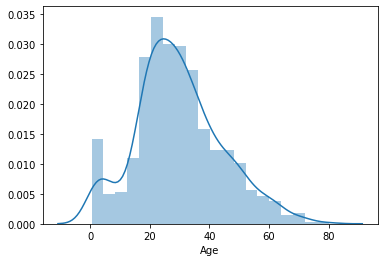

In [100]:
import seaborn as sns
sns.distplot(df["Age"].dropna())

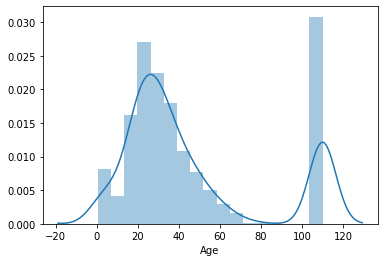

In [101]:
sns.distplot(df["Age"].fillna(110))

### 1.Gaussion Distubuted

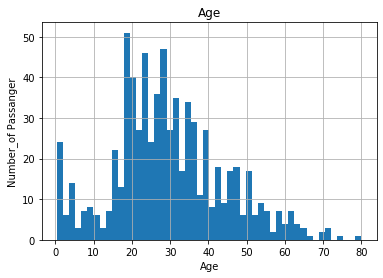

In [102]:
figure = df["Age"].hist(bins=50)
figure.set_title("Age")
figure.set_xlabel("Age")
figure.set_ylabel("Number_of Passanger");

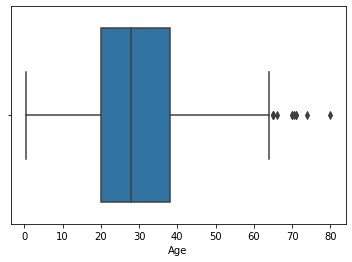

In [103]:
sns.boxplot(df["Age"])

In [104]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [105]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
upper_boundary = df["Age"].mean()+3*df["Age"].std()
lower_boundary= df["Age"].mean()- 3*df["Age"].std()##  %99.5 data reprisents. 
print(upper_boundary)
print(lower_boundary)
print(df["Age"].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [106]:
df["Age"] = np.where(df["Age"]>upper_boundary,upper_boundary,df["Age"])

In [107]:
def outliers_gaussion(df,variable):
    upper_boundary = df[variable].mean()+3*df[variable].std()
    lower_boundary= df[variable].mean()-3*df[variable].std()
    df[variable] = np.where(df[variable]>upper_boundary,upper_boundary,df[variable])
    df[variable] = np.where(df[variable]<lower_boundary,lower_boundary,df[variable])
    return df[variable].describe()

 ### 2.Feature skewed 
 
 ##### Lets compute the Interquantile range to calculate the bourdaries

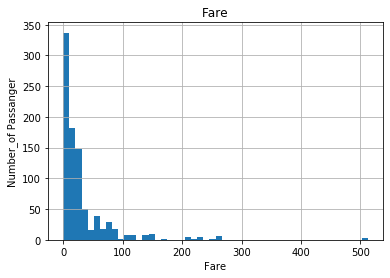

In [108]:
figure = df["Fare"].hist(bins=50)
figure.set_title("Fare")
figure.set_xlabel("Fare")
figure.set_ylabel("Number_of Passanger");

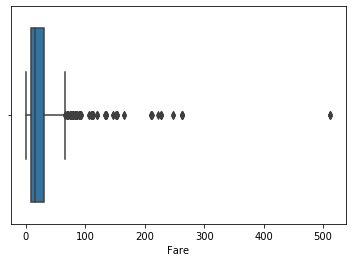

In [109]:
sns.boxplot(df["Fare"])

In [110]:
IQR = df["Fare"].quantile(0.75)-df["Fare"].quantile(0.25)
IQR

23.0896

In [111]:
lower_bridge = df["Fare"].quantile(0.25)-(IQR*1.5)
upper_bridge = df["Fare"].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
upper_bridge

-26.724


65.6344

In [112]:
extreme_lower_bridge = df["Fare"].quantile(0.25)-(IQR*3)
extreme_upper_bridge = df["Fare"].quantile(0.75)+(IQR*3)
print(extreme_lower_bridge)
extreme_upper_bridge

-61.358399999999996


100.2688

In [113]:
import numpy as np
df["Fare"] = np.where(df["Fare"]>upper_bridge,upper_bridge,df["Fare"])

In [114]:
df["Fare"].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [115]:
def outliers_skewed(df,variable):
    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge = df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge = df[variable].quantile(0.75)+(IQR*1.5)
    df[variable] = np.where(df[variable]>upper_bridge,upper_bridge,df[variable])
    df[variable] = np.where(df[variable]<lower_bridge,lower_bridge,df[variable])
    return df[variable].describe()

In [116]:
def outliers_extreme_skewed(df,variable):
    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge = df[variable].quantile(0.25)-(IQR*3)
    upper_bridge = df[variable].quantile(0.75)+(IQR*3)
    df[variable] = np.where(df[variable]>upper_bridge,upper_bridge,df[variable])
    df[variable] = np.where(df[variable]<lower_bridge,lower_bridge,df[variable])
    return df[variable].describe()

In [117]:
outliers_skewed(df,"Fare")

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [131]:
df = pd.read_csv("titanic.csv")

df["Age"]=df["Age"].dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
outliers_gaussion(df,"Age")

count    714.000000
mean      29.688694
std       14.492933
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       73.278610
Name: Age, dtype: float64

In [142]:
outliers_extreme_skewed(df,"Fare")

count    891.000000
mean      27.043158
std       27.339465
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      100.268800
Name: Fare, dtype: float64

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

In [144]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))


Accuracy_score: 0.6865671641791045


In [136]:
df = pd.read_csv("titanic.csv")
df["Age"]=df["Age"].dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),df['Survived'],test_size=0.3)

In [139]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))


Accuracy_score: 0.6119402985074627
